In [1]:
import numpy as np
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt

In [27]:
df= pd.read_csv("C:/KAGGLE/predict_sales/train.csv")

In [28]:
shops= pd.read_csv("C:/KAGGLE/predict_sales/shops.csv")

In [29]:
items= pd.read_csv("C:/KAGGLE/predict_sales/items.csv")

In [30]:
df1= pd.merge(df,items,on="item_id")

In [31]:
df1.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,23.01.2013,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
2,20.01.2013,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
3,02.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
4,03.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37


In [32]:
df1.drop(['item_name','item_id'],axis=1)

,date,date_block_num,shop_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,999.00,1.0,37
1,23.01.2013,0,24,999.00,1.0,37
2,20.01.2013,0,27,999.00,1.0,37
3,02.01.2013,0,25,999.00,1.0,37
4,03.01.2013,0,25,999.00,1.0,37
5,20.01.2013,0,25,999.00,1.0,37
6,23.01.2013,0,25,999.00,1.0,37
7,26.01.2013,0,25,999.00,1.0,37
8,27.01.2013,0,6,999.00,1.0,37
9,10.01.2013,0,15,999.00,1.0,37


In [33]:
from datetime import datetime

In [45]:
def getmonth(date):
    date= datetime.strptime(date,'%d.%m.%Y')
    return date.month

In [46]:
getmonth('1.10.2019')

10

In [47]:
day=[]
for d in df1['date']:
    day.append(getmonth(d))

In [54]:
df1=df1.drop(['item_name'],axis=1)


In [60]:
df1['da']=day
df1

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,day,da
0,0,59,22154,999.00,1.0,37,1,1
1,0,24,22154,999.00,1.0,37,1,1
2,0,27,22154,999.00,1.0,37,1,1
3,0,25,22154,999.00,1.0,37,1,1
4,0,25,22154,999.00,1.0,37,1,1
5,0,25,22154,999.00,1.0,37,1,1
6,0,25,22154,999.00,1.0,37,1,1
7,0,25,22154,999.00,1.0,37,1,1
8,0,6,22154,999.00,1.0,37,1,1
9,0,15,22154,999.00,1.0,37,1,1


In [67]:
df1.head()
df1= df1.drop(['da'],axis=1)

In [68]:
df2= df1[df1['day']==1]
    

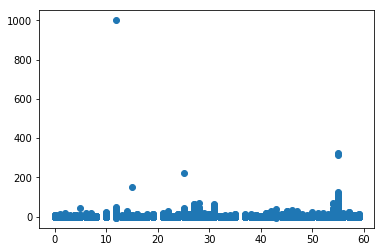

In [71]:
plt.scatter(df2['shop_id'],df2['item_cnt_day'])
plt.show()

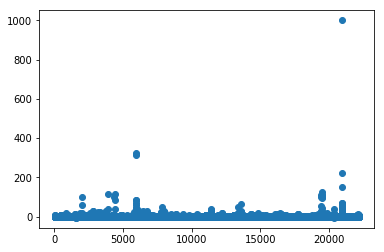

In [75]:
plt.scatter(df2['item_id'],df2['item_cnt_day'])
plt.show()

In [73]:
df3= df1.drop(['date_block_num'],axis=1)

In [74]:
df3.head()

,shop_id,item_id,item_price,item_cnt_day,item_category_id,day
0,59,22154,999.0,1.0,37,1
1,24,22154,999.0,1.0,37,1
2,27,22154,999.0,1.0,37,1
3,25,22154,999.0,1.0,37,1
4,25,22154,999.0,1.0,37,1


In [76]:
from sklearn.linear_model import LinearRegression

In [78]:
from sklearn.cross_validation import train_test_split
x= df3.drop(['item_price','item_category_id','day','item_cnt_day'],axis=1)
y= df3['item_cnt_day']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [83]:
clf= LinearRegression()
clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
y_pred=clf.predict(x_test)

In [87]:
y_pred

array([1.31124572, 1.25753145, 1.26266074, ..., 1.20797492, 1.29159815,
       1.29547145])

In [88]:
len(y_pred)

587170

In [89]:
y_pred=pd.DataFrame(y_pred)

In [90]:
y_pred

,0
0,1.311246
1,1.257531
2,1.262661
3,1.276916
4,1.233807
5,1.265174
6,1.218932
7,1.240159
8,1.329101
9,1.277036


In [94]:
from sklearn.metrics import r2_score

In [95]:
r2_score(y_pred,y_test)

-6648.281297347825

In [100]:
test= pd.read_csv("C:/KAGGLE/predict_sales/test.csv")

In [101]:
test= test.drop(['ID'],axis=1)

In [106]:
y_pred2=clf.predict(test)
y_pred2= pd.DataFrame(y_pred2)

In [107]:
y_pred2.to_csv("C:/KAGGLE/predict_sales/sample_submission.csv")